# Tabular Playground Series - Mar 2021 competition.

### Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

### Reading Files from zipped archieve

In [71]:
from zipfile import ZipFile, Path

# pass in the specific file name 
# to the open method
with ZipFile("tabular-playground-series-mar-2021.zip") as myzip:
    train = myzip.open("train.csv")
    test = myzip.open("test.csv")
    submission = myzip.open("sample_submission.csv")

#Now, we can read in the data
train = pd.read_csv(train, index_col='id')
test = pd.read_csv(test, index_col='id')
submission = pd.read_csv(submission, index_col='id')

### Exploring Dataset

In [32]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  cont0   300000 non-null  float64
 20  cont1   300000 non-null  float64
 21  cont2   30

In [35]:
train.shape

(300000, 31)

In [37]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cont0,300000.0,0.504749,0.206788,-0.049562,0.344985,0.479650,0.637657,1.004559
cont1,300000.0,0.494073,0.213037,0.084480,0.317363,0.463170,0.693992,1.009958
cont2,300000.0,0.516632,0.214851,0.094493,0.326047,0.471247,0.704625,1.016600
cont3,300000.0,0.474235,0.216636,-0.045316,0.292249,0.387564,0.644950,0.952187
cont4,300000.0,0.504848,0.227474,0.168071,0.279303,0.479858,0.725779,0.858578
cont5,300000.0,0.502257,0.241243,-0.036379,0.276442,0.554768,0.735225,0.853022
cont6,300000.0,0.488229,0.211335,0.005199,0.323914,0.518089,0.608537,0.966553
cont7,300000.0,0.501739,0.203496,0.090901,0.353054,0.435404,0.642023,1.035818
cont8,300000.0,0.488074,0.179048,0.024139,0.358915,0.410908,0.612725,1.055885
cont9,300000.0,0.469496,0.194516,0.214866,0.309934,0.407477,0.586793,1.005652


### Checking target class

<AxesSubplot:>

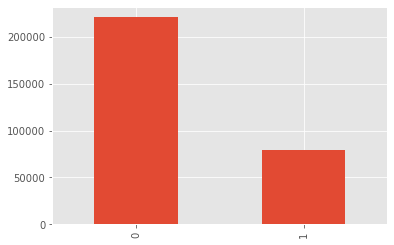

In [41]:
train['target'].value_counts().plot.bar()

In [42]:
train['target'].value_counts(normalize=True)

0    0.73513
1    0.26487
Name: target, dtype: float64

_Inbalance target_

In [33]:
test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
id,,,,,,,,,,,,,,,,,,,,,
5,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
6,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
8,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
9,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
11,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [26]:
submission.head()

,id,target
0,5,0.5
1,6,0.5
2,8,0.5
3,9,0.5
4,11,0.5


### Label Encoding of Categorical Variables

In [44]:
for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,8,0,1,1,33,0,44,54,0,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,0,8,0,0,4,33,8,48,3,5,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,0,10,0,0,4,33,0,30,38,9,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,0,10,0,2,4,33,0,50,3,5,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,0,8,6,1,4,33,2,32,54,0,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


### Test Train Split

In [63]:
X = train.drop('target', axis=1)
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y)

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
clf = RandomForestClassifier(n_estimators=200, max_depth=7, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') # 0.87323 shows we're doing better than a dummy model

0.87572


#### Without tuning

In [66]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') # 0.87323 shows we're doing better than a dummy model

0.88492


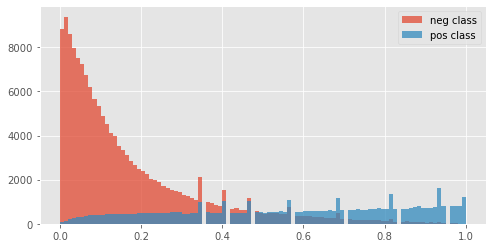

In [54]:
plt.figure(figsize=(8,4))
plt.hist(y_pred[np.where(y_test == 0)], bins=100, alpha=0.75, label='neg class')
plt.hist(y_pred[np.where(y_test == 1)], bins=100, alpha=0.75, label='pos class')
plt.legend()
plt.show()

### XGBOOST

In [67]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') # 0.87323 shows we're doing better than a dummy model

0.89006


_Better score_

### Submission file output

In [70]:
clf = xgb.XGBClassifier()
clf.fit(X, y)
submission['target'] = clf.predict_proba(test)[:, 1]
submission.to_csv('xgboost2.csv')

### SMOTE for Target Balance

In [72]:
y_train.value_counts()

0    154377
1     55623
Name: target, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Increasing number of Target 0 equal to Target 1
sm = SMOTE(random_state=42)

X_train_SM, y_train_SM = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_SM)))

Resampled dataset shape Counter({1: 154377, 0: 154377})


In [74]:
clf = xgb.XGBClassifier()
clf.fit(X_train_SM, y_train_SM)
y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') 

0.88108


_It's worse than without SMOTE_

In [75]:
clf = RandomForestClassifier()
clf.fit(X_train_SM, y_train_SM)
y_pred = clf.predict_proba(X_test)[:, 1] # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') 

0.88058


### Deep Learning

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
X_train.shape

(210000, 30)

In [78]:
X_test.shape

(90000, 30)

In [79]:
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [80]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [81]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 15)
model.fit(x=X_train, y=y_train, epochs=600,batch_size=512, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
411/411 [==============================] - 2s 3ms/step - loss: 0.5773 - accuracy: 0.7498 - val_loss: 0.3923 - val_accuracy: 0.8325
Epoch 2/600
411/411 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8302 - val_loss: 0.4190 - val_accuracy: 0.8255
Epoch 3/600
411/411 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8330 - val_loss: 0.3829 - val_accuracy: 0.8353
Epoch 4/600
411/411 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8321 - val_loss: 0.3879 - val_accuracy: 0.8331
Epoch 5/600
411/411 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8346 - val_loss: 0.3798 - val_accuracy: 0.8379
Epoch 6/600
411/411 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8351 - val_loss: 0.3835 - val_accuracy: 0.8344
Epoch 7/600
411/411 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8362 - val_loss: 0.3780 - val_accuracy: 0.8386

In [82]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

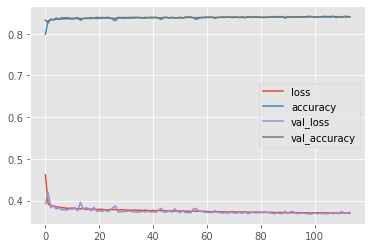

In [83]:
model_loss.plot()

In [85]:
y_pred = model.predict(X_test) # This grabs the positive class prediction
score = roc_auc_score(y_test, y_pred)
print(f'{score:0.5f}') 

0.87663
